In [ ]:
import pandas as pd

df = pd.read_csv('session_sequence.csv')


In [ ]:
df.head()

,user_pseudo_id,event_sequence
0,1063912917.1748976310,first_visit > session_start > page_view > Cust...
1,1128660820.1751464297,first_visit > session_start > page_view > view...
2,1168382083.1738111630,first_visit > session_start > page_view > cust...
3,118676617.1740348059,first_visit > session_start > page_view > cust...
4,1275453238.1739385908,first_visit > session_start > page_view > cust...


In [ ]:
df['event_sequence'] = df['event_sequence'].str.replace(
    'user_engagement > page_view > view_search_result',
    'search > view_search_result'
)


In [ ]:
df['event_list'] = df['event_sequence'].str.split(' > ')


In [ ]:
df.head()

,user_pseudo_id,event_sequence,event_list
0,1063912917.1748976310,first_visit > session_start > page_view > Cust...,"[first_visit, session_start, page_view, Custom..."
1,1128660820.1751464297,first_visit > session_start > page_view > view...,"[first_visit, session_start, page_view, view_s..."
2,1168382083.1738111630,first_visit > session_start > page_view > cust...,"[first_visit, session_start, page_view, custom..."
3,118676617.1740348059,first_visit > session_start > page_view > cust...,"[first_visit, session_start, page_view, custom..."
4,1275453238.1739385908,first_visit > session_start > page_view > cust...,"[first_visit, session_start, page_view, custom..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9845 entries, 0 to 9844
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_pseudo_id  9845 non-null   object
 1   event_sequence  9845 non-null   object
 2   event_list      9845 non-null   object
dtypes: object(3)
memory usage: 230.9+ KB


In [ ]:

all_events = set(event for path in df['event_list'] for event in path)


print(sorted(all_events))


['CustomerLoggedInSession', 'account_add_to_cart', 'account_all_clicks', 'account_order_search', 'account_order_search_filter', 'account_order_selected', 'account_update_address', 'ad_add_address', 'ad_add_user', 'ad_apply_search_filters', 'ad_delete_address', 'ad_delete_user', 'ad_edit_user', 'ad_invoice_modal', 'ad_nav_click', 'ad_order_selected', 'ad_order_tracking_modal', 'ad_portal_add_to_cart', 'ad_portal_search', 'ad_sort', 'ad_update_address', 'add_payment_info', 'add_shipping_info', 'add_to_cart', 'begin_checkout', 'click', 'contact_form_submit', 'corporate_accounts_form_fill', 'customer_session', 'egt_form', 'email_subscription', 'facet_click', 'featured_sub_nav_click', 'file_download', 'first_visit', 'form_submit', 'internal_search', 'login', 'microlearning_downloads', 'microlearning_form_fill', 'mpCustomerLoggedInSession', 'mpCustomerNotLoggedInSession', 'mpCustomer_session', 'page_view', 'poster_downloads', 'poster_form_fill', 'product_spec_click', 'purchase', 'related_pro

In [ ]:
from collections import Counter


flattened = [event for path in df['event_list'] for event in path]


event_counts = Counter(flattened)


event_df = pd.DataFrame(event_counts.items(), columns=['event', 'count']).sort_values('count', ascending=False)
print(event_df.head(20))


                           event   count
2                      page_view  159569
4                user_engagement  137902
3        CustomerLoggedInSession  111321
9                         scroll   95819
14              customer_session   48837
5                      view_item   39272
10             add_shipping_info   28273
6                    add_to_cart   27694
8                 begin_checkout   15789
13           view_search_results   14513
1                  session_start   14209
16                        search   12823
7                      view_cart   11980
22  mpCustomerNotLoggedInSession   11025
11              add_payment_info   10914
0                    first_visit    9856
12                      purchase    9845
27     mpCustomerLoggedInSession    9391
19                  ad_nav_click    4876
17               internal_search    4778


In [ ]:
event_df[20:40]

,event,count
18,remove_from_cart,3700
31,mpCustomer_session,2001
23,login,1917
15,facet_click,1491
28,ad_order_selected,1325
29,product_spec_click,646
21,ad_portal_add_to_cart,579
24,safety_matters,177
34,featured_sub_nav_click,160
39,view_item_list,135


In [ ]:
event_df[40:70]

,event,count
45,user_session,42
49,ad_invoice_modal,38
20,click,32
46,select_item,30
32,ad_sort,26
25,ad_delete_user,24
64,safety_training_download,22
36,account_order_selected,21
48,ad_order_tracking_modal,19
63,microlearning_downloads,16


In [ ]:
stage_map = {
    # Awareness
    'first_visit': 1,
    'session_start': 1,
    'page_view': 1,
    'scroll': 1,
    'user_engagement': 1,
    'customer_session': 1,
    'mpCustomerLoggedInSession': 1,
    'mpCustomerNotLoggedInSession': 1,
    'CustomerLoggedInSession': 1,
    'login': 1,
    'user_session': 1,

    # Product Exploration
    'view_item_list': 2,
    'view_item': 2,
    'view_cart': 2,
    'related_product': 2,
    'product_spec_click': 2,
    'store_product_spec_sheet_view': 2,
    'select_item': 2,
    'view_search_results': 2,
    'search': 2,

    # Add to Cart
    'add_to_cart': 3,
    'remove_from_cart': 3,
    'account_add_to_cart': 3,
    'ad_portal_add_to_cart': 3,

    # Checkout Process
    'begin_checkout': 4,
    'add_shipping_info': 5,
    'add_payment_info': 5,

    # Purchase
    'purchase': 6,

    # Admin / Navigation
    'ad_add_address': 0,
    'ad_delete_address': 0,
    'ad_add_user': 0,
    'ad_delete_user': 0,
    'ad_edit_user': 0,
    'ad_nav_click': 0,
    'ad_sort': 0,
    'ad_order_selected': 0,
    'ad_order_tracking_modal': 0,
    'ad_invoice_modal': 0,
    'ad_portal_search': 0,
    'ad_update_address': 0,
    'account_order_search': 0,
    'account_order_search_filter': 0,
    'account_order_selected': 0,
    'account_all_clicks': 0,
    'account_update_address': 0,

    # Forms & Engagements
    'form_submit': 0,
    'contact_form_submit': 0,
    'corporate_accounts_form_fill': 0,
    'vending_form_fill': 0,
    'poster_form_fill': 0,
    'egt_form': 0,
    'microlearning_form_fill': 0,
    'email_subscription': 0,

    # Content / Media Interaction
    'file_download': 0,
    'poster_downloads': 0,
    'microlearning_downloads': 0,
    'videoProgress25': 0,
    'videoProgress50': 0,
    'videoProgress75': 0,

    # Other
    'internal_search': 2,
    'facet_click': 1,
    'featured_sub_nav_click': 1,
    'click': 1,
    'safety_matters': 0,
    'safety_training_download': 0,
}


In [ ]:
def calculate_backsteps(event_list, stage_map):
    stages = [stage_map.get(e, 0) for e in event_list]
    backstep_count = 0
    for i in range(1, len(stages)):
        if stages[i] < stages[i-1]:
            backstep_count += 1
    return backstep_count

df['backstep_count'] = df['event_list'].apply(lambda x: calculate_backsteps(x, stage_map))


In [ ]:
def filter_by_stage(event_list, stage_map):
    return [e for e in event_list if stage_map.get(e, 0) > 0]

df['filtered_event_list'] = df['event_list'].apply(lambda x: filter_by_stage(x, stage_map))


In [ ]:
from collections import Counter
import pandas as pd


user_event_counts = []

for uid, events in zip(df['user_pseudo_id'], df['filtered_event_list']):
    counts = Counter(events)
    counts['user_pseudo_id'] = uid
    user_event_counts.append(counts)

# DataFrame
event_count_df = pd.DataFrame(user_event_counts).fillna(0)


cols = ['user_pseudo_id'] + sorted([c for c in event_count_df.columns if c != 'user_pseudo_id'])
event_count_df = event_count_df[cols]


In [ ]:
event_count_df

,user_pseudo_id,CustomerLoggedInSession,account_add_to_cart,ad_portal_add_to_cart,add_payment_info,add_shipping_info,add_to_cart,begin_checkout,click,customer_session,...,search,select_item,session_start,store_product_spec_sheet_view,user_engagement,user_session,view_cart,view_item,view_item_list,view_search_results
0,1063912917.1748976310,19.0,0.0,0.0,1.0,2.0,4.0,1.0,0.0,0.0,...,0.0,0.0,1,0.0,18.0,0.0,1.0,4.0,0.0,0.0
1,1128660820.1751464297,3.0,0.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,...,0.0,0.0,1,0.0,3.0,0.0,0.0,1.0,0.0,1.0
2,1168382083.1738111630,0.0,0.0,0.0,1.0,2.0,5.0,3.0,0.0,28.0,...,5.0,0.0,3,0.0,21.0,0.0,3.0,10.0,0.0,5.0
3,118676617.1740348059,0.0,0.0,0.0,1.0,2.0,3.0,1.0,1.0,22.0,...,3.0,0.0,1,0.0,13.0,0.0,0.0,5.0,0.0,4.0
4,1275453238.1739385908,8.0,0.0,0.0,1.0,2.0,3.0,1.0,0.0,5.0,...,3.0,0.0,3,0.0,8.0,0.0,2.0,3.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9840,1361396792.1744817384,2.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1,0.0,2.0,0.0,0.0,1.0,0.0,0.0
9841,1843832116.1749671505,2.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1,0.0,2.0,0.0,0.0,1.0,0.0,0.0
9842,1089648870.1746556809,2.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1,0.0,2.0,0.0,0.0,1.0,0.0,0.0
9843,1386159867.1746054247,2.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1,0.0,2.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
df.head()

,user_pseudo_id,event_sequence,event_list,backstep_count,filtered_event_list
0,1063912917.1748976310,first_visit > session_start > page_view > Cust...,"[first_visit, session_start, page_view, Custom...",7,"[first_visit, session_start, page_view, Custom..."
1,1128660820.1751464297,first_visit > session_start > page_view > view...,"[first_visit, session_start, page_view, view_s...",4,"[first_visit, session_start, page_view, view_s..."
2,1168382083.1738111630,first_visit > session_start > page_view > cust...,"[first_visit, session_start, page_view, custom...",29,"[first_visit, session_start, page_view, custom..."
3,118676617.1740348059,first_visit > session_start > page_view > cust...,"[first_visit, session_start, page_view, custom...",18,"[first_visit, session_start, page_view, custom..."
4,1275453238.1739385908,first_visit > session_start > page_view > cust...,"[first_visit, session_start, page_view, custom...",13,"[first_visit, session_start, page_view, custom..."


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1) event_count_df
df_backstep = df[['user_pseudo_id', 'backstep_count']].drop_duplicates()

# 2) Combination
final_df = event_count_df.merge(df_backstep, on='user_pseudo_id', how='left')

feature_cols = [c for c in final_df.columns if c != 'user_pseudo_id']
X = final_df[feature_cols].astype(float)

# 2) Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3) PCA
pca = PCA(n_components=min(20, X_scaled.shape[1]))
X_pca = pca.fit_transform(X_scaled)

# 4) K=5
kmeans = KMeans(n_clusters=5, n_init=50, random_state=42)
final_df['cluster'] = kmeans.fit_predict(X_pca)

summary = (
    final_df.groupby('cluster')
            .agg(
                users=('user_pseudo_id','nunique'),
                avg_backstep=('backstep_count','mean')
            )
            .reset_index()
)

# 6) Calculate Cluster
event_cols = [c for c in final_df.columns if c not in ['user_pseudo_id','cluster','backstep_count']]
cluster_event_means = final_df.groupby('cluster')[event_cols].mean()

def top_events(row, topn=8):
    return ', '.join(row.sort_values(ascending=False).head(topn).index.tolist())

summary['top_events'] = cluster_event_means.apply(top_events, axis=1)

summary



K=5 聚类摘要：
    cluster  users  avg_backstep  \
0        0     89     93.955056   
1        1   7880      7.330457   
2        2    590     29.871186   
3        3      2    150.000000   
4        4   1284     23.121495   

                                          top_events  
0  page_view, CustomerLoggedInSession, user_engag...  
1  page_view, user_engagement, CustomerLoggedInSe...  
2  scroll, customer_session, page_view, user_enga...  
3  page_view, user_engagement, view_search_result...  
4  CustomerLoggedInSession, page_view, user_engag...  


In [ ]:
summary

,cluster,users,avg_backstep,top_events
0,0,89,93.955056,"page_view, CustomerLoggedInSession, user_engag..."
1,1,7880,7.330457,"page_view, user_engagement, CustomerLoggedInSe..."
2,2,590,29.871186,"scroll, customer_session, page_view, user_enga..."
3,3,2,150.000000,"page_view, user_engagement, view_search_result..."
4,4,1284,23.121495,"CustomerLoggedInSession, page_view, user_engag..."


In [ ]:
final_df.head()

,user_pseudo_id,CustomerLoggedInSession,account_add_to_cart,ad_portal_add_to_cart,add_payment_info,add_shipping_info,add_to_cart,begin_checkout,click,customer_session,...,session_start,store_product_spec_sheet_view,user_engagement,user_session,view_cart,view_item,view_item_list,view_search_results,backstep_count,cluster
0,1063912917.1748976310,19.0,0.0,0.0,1.0,2.0,4.0,1.0,0.0,0.0,...,1,0.0,18.0,0.0,1.0,4.0,0.0,0.0,7,2
1,1128660820.1751464297,3.0,0.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,...,1,0.0,3.0,0.0,0.0,1.0,0.0,1.0,4,2
2,1168382083.1738111630,0.0,0.0,0.0,1.0,2.0,5.0,3.0,0.0,28.0,...,3,0.0,21.0,0.0,3.0,10.0,0.0,5.0,29,1
3,118676617.1740348059,0.0,0.0,0.0,1.0,2.0,3.0,1.0,1.0,22.0,...,1,0.0,13.0,0.0,0.0,5.0,0.0,4.0,18,2
4,1275453238.1739385908,8.0,0.0,0.0,1.0,2.0,3.0,1.0,0.0,5.0,...,3,0.0,8.0,0.0,2.0,3.0,0.0,5.0,13,2


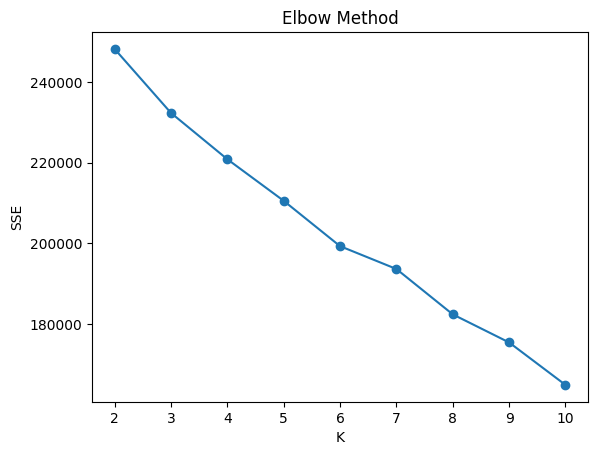

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sse = []
K_range = range(2, 11)
for k in K_range:
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    km.fit(X_pca)
    sse.append(km.inertia_)

plt.plot(K_range, sse, 'o-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()


In [ ]:
from collections import Counter
import pandas as pd

# 1. filtered_event_list
flattened_events = [event for sublist in df['filtered_event_list'] for event in sublist]

# 2.
event_counts = Counter(flattened_events)

# 3.
min_freq = 10
frequent_events = {event for event, count in event_counts.items() if count >= min_freq}

# 4.
noise_events = {
    'page_view', 'user_engagement', 'scroll', 'session_start',
    'CustomerLoggedInSession', 'mpCustomerLoggedInSession', 'customer_session'
}

# 5.
excluded_events = set(event_counts.keys()) - frequent_events
final_exclude = excluded_events | noise_events

# 6.
def filter_event_list(event_list):
    return [e for e in event_list if e not in final_exclude]

# 7.
df['clean_event_list'] = df['filtered_event_list'].apply(filter_event_list)


In [ ]:
df.head()

,user_pseudo_id,event_sequence,event_list,backstep_count,filtered_event_list,clean_event_list,clean_event_str,path_len,unique_events,cluster
0,1063912917.1748976310,first_visit > session_start > page_view > Cust...,"[first_visit, session_start, page_view, Custom...",7,"[first_visit, session_start, page_view, Custom...","[first_visit, view_item, add_to_cart, view_ite...",first_visit view_item add_to_cart view_item ad...,15,8,1
1,1128660820.1751464297,first_visit > session_start > page_view > view...,"[first_visit, session_start, page_view, view_s...",4,"[first_visit, session_start, page_view, view_s...","[first_visit, view_search_results, view_item, ...",first_visit view_search_results view_item add_...,10,8,1
2,1168382083.1738111630,first_visit > session_start > page_view > cust...,"[first_visit, session_start, page_view, custom...",29,"[first_visit, session_start, page_view, custom...","[first_visit, view_item, facet_click, search, ...",first_visit view_item facet_click search view_...,45,13,0
3,118676617.1740348059,first_visit > session_start > page_view > cust...,"[first_visit, session_start, page_view, custom...",18,"[first_visit, session_start, page_view, custom...","[first_visit, view_item, view_item, view_item,...",first_visit view_item view_item view_item add_...,27,12,1
4,1275453238.1739385908,first_visit > session_start > page_view > cust...,"[first_visit, session_start, page_view, custom...",13,"[first_visit, session_start, page_view, custom...","[first_visit, search, view_search_results, int...",first_visit search view_search_results interna...,25,12,1
